In [4]:
pip install twython

Note: you may need to restart the kernel to use updated packages.


In [5]:
from twython import Twython


In [7]:
API_KEY = 'xxxxxxxxxxxx'
API_SECRET_KEY = 'xxxxxxxxxxxxxxxxxxxxxxxxx'

twitter = Twython(API_KEY, API_SECRET_KEY)

authentication_tokens = twitter.get_authentication_tokens()
print(authentication_tokens['auth_url'])

TwythonAuthError: Twitter API returned a 401 (Unauthorized), b'{"errors":[{"code":32,"message":"Could not authenticate you."}]}'

In [8]:
VERIFIER = '0000000'

twitter = Twython(API_KEY, API_SECRET_KEY,
                  authentication_tokens['oauth_token'],
                  authentication_tokens['oauth_token_secret'])

authorized_tokens = twitter.get_authorized_tokens(VERIFIER)

NameError: name 'authentication_tokens' is not defined

In [9]:
twitter = Twython(API_KEY, API_SECRET_KEY,
                  authorized_tokens['oauth_token'],
                  authorized_tokens['oauth_token_secret'])

twitter.verify_credentials()

NameError: name 'authorized_tokens' is not defined

In [10]:
user = twitter.show_user(screen_name='OSoMe_IU')
user

TwythonError: HTTPSConnectionPool(host='api.twitter.com', port=443): Max retries exceeded with url: /1.1/users/show.json?screen_name=OSoMe_IU (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x000001EA2003B3D0>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))

In [11]:
user['screen_name']


NameError: name 'user' is not defined

In [12]:
print("""
Twitter user @{screen_name}
has {followers_count} followers,
follows {friends_count} users,
and has tweeted {statuses_count} times.
""".format(**user))

NameError: name 'user' is not defined

In [13]:
most_recent_tweet = user['status']
most_recent_tweet

NameError: name 'user' is not defined

In [16]:
most_recent_tweet['text']


NameError: name 'most_recent_tweet' is not defined

In [15]:
most_recent_tweet['entities']


NameError: name 'most_recent_tweet' is not defined

In [17]:
    most_recent_tweet['entities']['user_mentions']


NameError: name 'most_recent_tweet' is not defined

In [18]:
search_response = twitter.search(q='#science', count=100)


TwythonError: HTTPSConnectionPool(host='api.twitter.com', port=443): Max retries exceeded with url: /1.1/search/tweets.json?q=%23science&count=100 (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x000001EA1EC106A0>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))

In [19]:
search_tweets = search_response['statuses']
tweet = search_tweets[0]
tweet


NameError: name 'search_response' is not defined

In [21]:
tweet['user']


NameError: name 'tweet' is not defined

In [22]:
search_response = twitter.search(q='#science', count=1000)
len(search_response['statuses'])

TwythonError: HTTPSConnectionPool(host='api.twitter.com', port=443): Max retries exceeded with url: /1.1/search/tweets.json?q=%23science&count=1000 (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x000001EA200F7370>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))

In [23]:
import itertools

NUM_TWEETS_TO_FETCH = 1000

cursor = twitter.cursor(twitter.search, q='#science', count=100, result_type='mixed')
search_tweets = list(itertools.islice(cursor, NUM_TWEETS_TO_FETCH))
len(search_tweets)

TwythonError: HTTPSConnectionPool(host='api.twitter.com', port=443): Max retries exceeded with url: /1.1/search/tweets.json?q=%23science&count=100&result_type=mixed (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x000001EA200F7130>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))

In [24]:
type(cursor)


generator

In [25]:
twitter.get_application_rate_limit_status()['resources']['search']


TwythonError: HTTPSConnectionPool(host='api.twitter.com', port=443): Max retries exceeded with url: /1.1/application/rate_limit_status.json (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x000001EA20103BE0>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))

In [ ]:
import networkx as nx

D = nx.DiGraph()

publisher = twitter.show_user(screen_name='CambridgeUP')
author = twitter.show_user(screen_name='osome_iu')

D.add_edge(publisher['screen_name'], author['screen_name'], weight=1)

In [27]:
list(D.edges(data=True))

[]

In [28]:
import itertools

NUM_TWEETS_TO_FETCH = 1000

cursor = twitter.cursor(twitter.search, q='#science', count=100, result_type='mixed')
search_tweets = list(itertools.islice(cursor, NUM_TWEETS_TO_FETCH))
len(search_tweets)

TwythonError: HTTPSConnectionPool(host='api.twitter.com', port=443): Max retries exceeded with url: /1.1/search/tweets.json?q=%23science&count=100&result_type=mixed (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x000001EA200CFE80>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))

In [29]:
retweets = []
for tweet in search_tweets:
    if 'retweeted_status' in tweet:
        retweets.append(tweet)
len(retweets)

NameError: name 'search_tweets' is not defined

In [30]:
import networkx as nx

D = nx.DiGraph()

for retweet in retweets:
    retweeted_status = retweet['retweeted_status']
    retweeted_sn = retweeted_status['user']['screen_name']
    retweeter_sn = retweet['user']['screen_name']
    
    # Edge direction: retweeted_sn -> retweeter_sn
    if D.has_edge(retweeted_sn, retweeter_sn):
        D.edges[retweeted_sn, retweeter_sn]['weight'] += 1
    else:
        D.add_edge(retweeted_sn, retweeter_sn, weight=1)

In [31]:
max(D.nodes, key=D.out_degree)


ValueError: max() arg is an empty sequence

In [34]:
from operator import itemgetter

sorted(D.out_degree(), key=itemgetter(1), reverse=True)[:5]


[]

In [33]:
sorted(D.out_degree(weight='weight'), key=itemgetter(1), reverse=True)[:5]


[]

In [35]:
sorted(D.in_degree(weight='weight'), key=itemgetter(1), reverse=True)[:5]


[]

In [36]:
nx.is_weakly_connected(D)


NetworkXPointlessConcept: Connectivity is undefined for the null graph.

In [37]:
nx.number_weakly_connected_components(D)


0

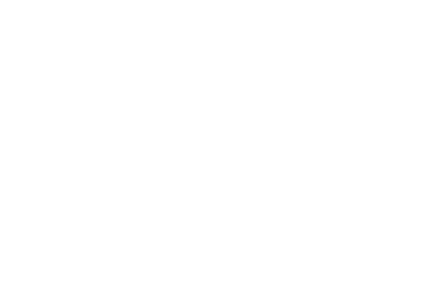

In [38]:
node_sizes = [D.out_degree(n, weight='weight') * 50 for n in D.nodes]

%matplotlib inline
nx.draw(D, node_size=node_sizes)

In [39]:
import itertools

NUM_TWEETS_TO_FETCH = 1000

cursor = twitter.cursor(twitter.search, q='#science', count=100, result_type='mixed')
search_tweets = list(itertools.islice(cursor, NUM_TWEETS_TO_FETCH))
len(search_tweets)

TwythonError: HTTPSConnectionPool(host='api.twitter.com', port=443): Max retries exceeded with url: /1.1/search/tweets.json?q=%23science&count=100&result_type=mixed (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x000001EA201099D0>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))

In [40]:
import networkx as nx

D = nx.DiGraph()

for tweet in search_tweets:
    tweet_sn = tweet['user']['screen_name']
    for user_mention in tweet['entities']['user_mentions']:
        mentioned_sn = user_mention['screen_name']
        
        my_edge = (tweet_sn, mentioned_sn)
        if D.has_edge(*my_edge):
            D.edges[my_edge]['weight'] += 1
        else:
            D.add_edge(*my_edge, weight=1)

NameError: name 'search_tweets' is not defined

In [41]:
max(D.nodes, key=D.in_degree)


ValueError: max() arg is an empty sequence

In [42]:
from operator import itemgetter

sorted(D.in_degree(), key=itemgetter(1), reverse=True)[:5]

[]

In [43]:
sorted(D.in_degree(weight='weight'), key=itemgetter(1), reverse=True)[:5]

[]

In [44]:
sorted(D.out_degree(weight='weight'), key=itemgetter(1), reverse=True)[:5]


[]

In [45]:
nx.is_weakly_connected(D)



NetworkXPointlessConcept: Connectivity is undefined for the null graph.

In [46]:
nx.number_weakly_connected_components(D)


0

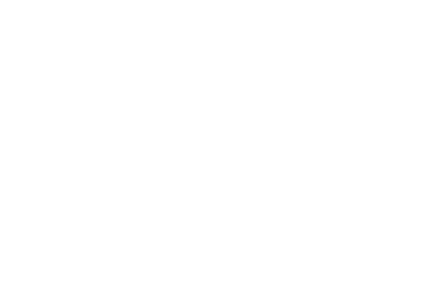

In [47]:
node_sizes = [D.in_degree(n, weight='weight') * 50 for n in D.nodes]

%matplotlib inline
nx.draw(D, node_size=node_sizes)

In [ ]:
#### مفيش كود راضي يشتغل 
#### مش عارف اجيب تويتر api 